# **1. Data Preparation**

In [1]:
DATASET_PATH = '../opportunity'

# **1.1 Install dependencies**

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import cudf
from cuml.ensemble import RandomForestClassifier as curfc
from cuml.metrics import accuracy_score

# 1.2 Preprocessing the Sensors Data to a Pandas Dataframe

In [3]:
# this cell is for preprocessing the sensors_data.txt
# to understand the columns of sensors data check: column_names.txt

import pandas as pd

# we choose 1 to 250 as the column_names.txt has defined the columns in this way
start_column = 1
end_column = 250


def preprocess_sensors_data(file_path):
    # Generate column names as a range of numbers
    column_names = list(range(start_column, end_column + 1))
    df = pd.read_csv(file_path, sep=' ')
    df.columns = column_names
    return df

def concatenate_sensor_data(base_path, ranges, drill=False):
  # Create an empty DataFrame with specified column names
    column_names = list(range(start_column, end_column + 1))
    df_concatenated = pd.DataFrame(columns=column_names)
    for range_tuple in ranges:
        for i in range_tuple[0]:
            for j in range_tuple[1]:
                file_path = f"{base_path}/S{i}-ADL{j}/S{i}-ADL{j}_sensors_data.txt"
                print(file_path)  # For demonstration, you can remove this line
                df = preprocess_sensors_data(file_path)  # Assuming preprocess_sensors_data is defined elsewhere
                df_concatenated = pd.concat([df_concatenated, df], ignore_index=True)
    if drill:
      for i in ranges[0][0]:
        # lastly include the drill run
        file_path = f'{DATASET_PATH}/data/S{i}-Drill/S{i}-Drill_sensors_data.txt'
        print(file_path)
        df = preprocess_sensors_data(file_path)
        df_concatenated = pd.concat([df_concatenated, df])

    return df_concatenated


# 4- Testing with selected features

## *4.1 Pre-processing*

In [4]:
# train set
# train on subjects 2,3 and 4

ranges = [(range(1, 4), range(1, 4))]

# Define the base path
base_path = f'{DATASET_PATH}/data'

# Call the function to concatenate the sensor data
df_train = concatenate_sensor_data(base_path, ranges, drill=False)


../opportunity/data/S1-ADL1/S1-ADL1_sensors_data.txt


/tmp/ipykernel_81812/3743742827.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_concatenated = pd.concat([df_concatenated, df], ignore_index=True)


../opportunity/data/S1-ADL2/S1-ADL2_sensors_data.txt
../opportunity/data/S1-ADL3/S1-ADL3_sensors_data.txt
../opportunity/data/S2-ADL1/S2-ADL1_sensors_data.txt
../opportunity/data/S2-ADL2/S2-ADL2_sensors_data.txt
../opportunity/data/S2-ADL3/S2-ADL3_sensors_data.txt
../opportunity/data/S3-ADL1/S3-ADL1_sensors_data.txt
../opportunity/data/S3-ADL2/S3-ADL2_sensors_data.txt
../opportunity/data/S3-ADL3/S3-ADL3_sensors_data.txt


In [5]:
# validation set
# subjects 2,3 and 4 runs 4 to 5

ranges = [(range(1, 4), range(4, 6))]

# Define the base path
base_path = f'{DATASET_PATH}/data'

# Call the function to concatenate the sensor data
df_val = concatenate_sensor_data(base_path, ranges, drill=False)

../opportunity/data/S1-ADL4/S1-ADL4_sensors_data.txt


/tmp/ipykernel_81812/3743742827.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_concatenated = pd.concat([df_concatenated, df], ignore_index=True)


../opportunity/data/S1-ADL5/S1-ADL5_sensors_data.txt
../opportunity/data/S2-ADL4/S2-ADL4_sensors_data.txt
../opportunity/data/S2-ADL5/S2-ADL5_sensors_data.txt
../opportunity/data/S3-ADL4/S3-ADL4_sensors_data.txt
../opportunity/data/S3-ADL5/S3-ADL5_sensors_data.txt


In [6]:
# test set
# subject 1

ranges = [(range(4, 5), range(1, 6))]

# Define the base path
base_path = f'{DATASET_PATH}/data'

# Call the function to concatenate the sensor data
df_test = concatenate_sensor_data(base_path, ranges, drill=False)

../opportunity/data/S4-ADL1/S4-ADL1_sensors_data.txt


/tmp/ipykernel_81812/3743742827.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_concatenated = pd.concat([df_concatenated, df], ignore_index=True)


../opportunity/data/S4-ADL2/S4-ADL2_sensors_data.txt
../opportunity/data/S4-ADL3/S4-ADL3_sensors_data.txt
../opportunity/data/S4-ADL4/S4-ADL4_sensors_data.txt
../opportunity/data/S4-ADL5/S4-ADL5_sensors_data.txt


In [7]:
# filtering and imputing missing values with mean


df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)
df_val.fillna(df_val.mean(), inplace=True)

df_train_filtered = df_train[df_train[244] != 0]
df_test_filtered = df_test[df_test[244] != 0]
df_val_filtered = df_val[df_val[244] != 0]

/tmp/ipykernel_81812/1597138037.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.fillna(df_train.mean(), inplace=True)
/tmp/ipykernel_81812/1597138037.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test.fillna(df_test.mean(), inplace=True)
/tmp/ipykernel_81812/1597138037.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

In [8]:
# 4 5 6 HIP +
# 7 8 9 LUA^ +
# 10 11 12 RUA_ +
# 13 14 15 LH +
# 16 17 18 BACK +
# 19 20 21 RKN_ -
# 22 23 24 RWR +
# 37 38 39 - 49 IMU BACK acc including BACK MAGN +
# 56 57 58 RUA MAGN +
# 84 85 86 LUA MAGN +
# 97 LLA MAGN +
# 102 L SHOE +
# 127 128 129 R SHOE ANG_VEL +

# l = [4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18,  22,23,24, 37,38,39,40,41,42,43,44,45,46,47,48,49, 56,57,58,  84,85,86, 97, 102, 127,128,129, 243]
l = [4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18,  22,23,24, 37,38,39,43,44,45, 56,57,58,  84,85,86, 97, 102, 243]


df_train_filtered = df_train_filtered[df_train_filtered.columns[l]]
df_val_filtered = df_val_filtered[df_val_filtered.columns[l]]
df_test_filtered = df_test_filtered[df_test_filtered.columns[l]]

In [9]:
print(df_train_filtered.columns)

Index([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  23,  24,  25,  38,  39,  40,  44,  45,  46,  57,  58,  59,  85,
        86,  87,  98, 103, 244],
      dtype='int64')


In [10]:
df_test_filtered.columns

Index([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  23,  24,  25,  38,  39,  40,  44,  45,  46,  57,  58,  59,  85,
        86,  87,  98, 103, 244],
      dtype='int64')

In [11]:
# df_new = df_new.dropna()
X = np.array(df_train_filtered.drop([244], axis=1))
y = np.array(df_train_filtered[244])
y = y.astype('int')

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X)
X_val_scaled = scaler.transform(df_val_filtered.drop([244], axis=1))
y_val = np.array(df_val_filtered[244])
y_val = y_val.astype('int')


## Training using cuML

In [12]:
# Data conversion
X_cudf_train = cudf.DataFrame(data=X_train_scaled)
X_cudf_val = cudf.DataFrame(data=X_val_scaled)

y_cudf_train = cudf.Series(y)

In [13]:
# Model training
cuml_model = curfc(max_depth=12,max_features='sqrt',n_estimators=400)

cuml_model.fit(X_cudf_train, y_cudf_train)

/home/mohamed/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/cupy/cuda/compiler.py:233: PerformanceWarning: Jitify is performing a one-time only warm-up to populate the persistent cache, this may take a few seconds and will be improved in a future release...
  jitify._init_module()
/home/mohamed/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


RandomForestClassifier()

In [20]:
# Make predictions on the test set
y_pred = cuml_model.predict(X_cudf_val).to_numpy()

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy with selected features: {accuracy:.2f}")

print(classification_report(y_val, y_pred))

Accuracy with selected features: 0.87
              precision    recall  f1-score   support

           1       0.80      0.94      0.87     57026
           2       0.89      0.68      0.77     38863
           4       0.97      0.97      0.97     37887
           5       0.99      0.90      0.94      7775

    accuracy                           0.87    141551
   macro avg       0.91      0.87      0.89    141551
weighted avg       0.88      0.87      0.87    141551



## Saving cuML model

In [17]:
import pickle

# Save the trained cuml model into a file
pickle.dump(cuml_model, open('./pickled/cuml_model.pkl', 'wb'))
pickle.dump(scaler, open('./pickled/scaler.pkl', 'wb'))

In [18]:
# Save treelite file
cuml_model.convert_to_treelite_model().to_treelite_checkpoint('./pickled/cuml_model.tl')

In [19]:
import pickle

# Load pickled model
cuml_model = pickle.load(open('./pickled/cuml_model.pkl', 'rb'))
scaler = pickle.load(open('./pickled/scaler.pkl', 'rb'))

## Training using sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr


# Create a RandomForestClassifier with class weights
rf_model = RandomForestClassifier(class_weight='balanced',max_depth=12,max_features='sqrt',n_estimators=400)

rf_model.fit(X_train_scaled, y)

# Make predictions on the test set
y_pred = rf_model.predict(X_val_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy with selected features: {accuracy:.2f}")

print(classification_report(y_val, y_pred))

Accuracy with selected features: 0.86
              precision    recall  f1-score   support

           1       0.90      0.78      0.84     57026
           2       0.73      0.88      0.80     38863
           4       0.95      0.98      0.96     37887
           5       0.99      0.78      0.87      7775

    accuracy                           0.86    141551
   macro avg       0.89      0.85      0.87    141551
weighted avg       0.87      0.86      0.86    141551



In [ ]:
X = np.array(df_test_filtered.drop([244], axis=1))
y = np.array(df_test_filtered[244])
y = y.astype('int')

X_scaled = scaler.transform(X)
y_pred = rf_model.predict(X_scaled)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.80      0.83     50952
           2       0.71      0.77      0.74     29456
           4       0.94      0.98      0.96     19364
           5       1.00      0.96      0.98      5310

    accuracy                           0.83    105082
   macro avg       0.88      0.88      0.88    105082
weighted avg       0.84      0.83      0.84    105082



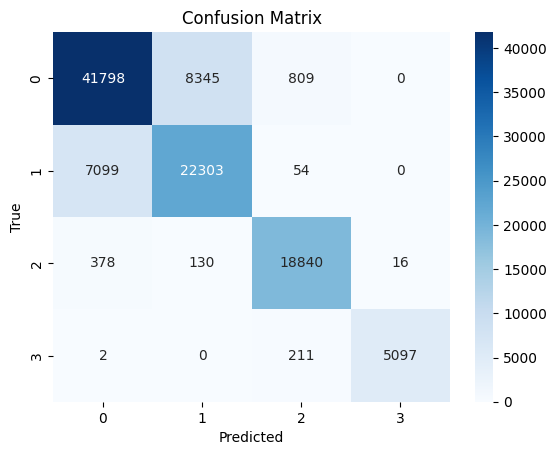

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Saving sklearn model

In [ ]:
import joblib

joblib.dump(rf_model, f'{DATASET_PATH}/rf_model.pkl')

# save the scaler
joblib.dump(scaler, f'{DATASET_PATH}/scaler.pkl')

['/content/gdrive/MyDrive/METU NCC/Graduation project/scaler_no_gyro_quat.pkl']

In [ ]:
# saving the trained model

import pickle


pickle.dump(rf_model, open(f'{DATASET_PATH}/rf_model.pkl', 'wb'))

# save the scaler
pickle.dump(scaler, open(f'{DATASET_PATH}/scaler.pkl', 'wb'))

In [ ]:
# load the model from gdrive

import joblib

rf_model = joblib.load(f'{DATASET_PATH}/rf_model.pkl')
scaler = joblib.load(f'{DATASET_PATH}/scaler.pkl')



## Reading test data

In [ ]:
# Create a list of column names from 1 to 250
column_names = list(range(1, 251))

# Read the CSV file and specify the column names
poses = ['standing', 'walking', 'sitting', 'lying']

df = pd.read_csv(f"/content/test_data_30_05_{poses[0]}.transformed.csv", sep=' ', names=column_names)

In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,...,241,242,243,244,245,246,247,248,249,250
0,0,NaN,NaN,NaN,220,899,287,21,582,183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55820,NaN,NaN,NaN,267,868,320,1341,524,344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,105559,NaN,NaN,NaN,211,947,285,-150,703,113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,156801,NaN,NaN,NaN,178,905,315,-1015,1039,378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,213005,NaN,NaN,NaN,92,862,463,508,389,-260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# l = [0, 4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18, 19,20,21, 22,23,24, 37,38,39,40,41,42,43,44,45,46,47,48,49, 56,57,58,  84,85,86, 97, 102, 127,128,129, 243]
# l = [0, 4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18,  22,23,24, 37,38,39,43,44,45,46,47,48,49, 56,57,58,  84,85,86, 97, 102, 243]
l = [0, 4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18,  22,23,24, 37,38,39,43,44,45, 56,57,58,  84,85,86, 97, 102, 243]


df_train_filtered = df[df.columns[l]]

In [ ]:
df_train_filtered

,1,5,6,7,8,9,10,11,12,13,...,46,57,58,59,85,86,87,98,103,244
0,0,220,899,287,21,582,183,291,969,318,...,-8,118,-325,-577,-437,527,472,-634,-37,NaN
1,55820,267,868,320,1341,524,344,599,819,45,...,-21,96,-285,-431,-142,195,51,-312,-37,NaN
2,105559,211,947,285,-150,703,113,301,883,320,...,-19,117,-335,-567,-425,479,534,-618,-37,NaN
3,156801,178,905,315,-1015,1039,378,202,912,351,...,-36,124,-360,-566,-370,425,542,-575,-38,NaN
4,213005,92,862,463,508,389,-260,-126,899,626,...,-23,108,-314,-546,-434,436,650,-651,-35,NaN


In [ ]:
df = df_train_filtered.fillna(df_train_filtered.mean())

In [ ]:
df

,1,5,6,7,8,9,10,11,12,13,...,46,57,58,59,85,86,87,98,103,244
0,0,220,899,287,21,582,183,291,969,318,...,-8,118,-325,-577,-437,527,472,-634,-37,NaN
1,55820,267,868,320,1341,524,344,599,819,45,...,-21,96,-285,-431,-142,195,51,-312,-37,NaN
2,105559,211,947,285,-150,703,113,301,883,320,...,-19,117,-335,-567,-425,479,534,-618,-37,NaN
3,156801,178,905,315,-1015,1039,378,202,912,351,...,-36,124,-360,-566,-370,425,542,-575,-38,NaN
4,213005,92,862,463,508,389,-260,-126,899,626,...,-23,108,-314,-546,-434,436,650,-651,-35,NaN


In [ ]:
# first 45000 ms -> standing
# next 0:45 to 1:44  -> walking
# from 1:44 to 2:36 -> standing
# from 3:21 to 3:42 -> sitting
# from 3:43 to 4:20 -> standing
# from 4:21 to 4:38 -> sitting
# 5:23 to 5:50 -> sitting
# 5:50 to 6:10 -> standing
# 6:10 to 6:40 -> sitting
# 6:52 to 7:20 -> walking
# 7:34 to 8:00 -> lying down
# 8:26 to 9:40 -> walking
# 9:40 to 10:08 -> standing
# 10:15 to 11:35 -> lying down
# 11:40 to 11:50 -> standing
# 11:59 to 12:40 -> sitting
# 14:40 to 15:20 -> standing

In [ ]:
l = ['1 MILLISEC',  '5 Acc HIP accX', '6 Acc HIP accY', '7 Acc HIP accZ',
       '8 Acc LUA^ accX', '9 Acc LUA^ accY', '10 Acc LUA^ accZ', '11 Acc RUA_ accX',
       '12 Acc RUA_ accY', '13 Acc RUA_ accZ', '14 Acc LH accX', '15 Acc LH accY',
       '16 Acc LH accZ', '17 Acc BACK accX', '18 Acc BACK accY', '19 Acc BACK accZ', '23 Acc RWR accX',
       '24 Acc RWR accY', '25 Acc RWR accZ', '38 IMU BACK accX', '39 IMU BACK accY', '40 IMU BACK accZ',
       '41 IMU BACK gyroX', '42 IMU BACK gyroY', '43 IMU BACK gyroZ', '44 IMU BACK magneticX',
       '45 IMU BACK magneticY', '46 IMU BACK magneticZ', '47 IMU BACK Quaternion1',
       '48 IMU BACK Quaternion2', '49 IMU BACK Quaternion3', '50 IMU BACK Quaternion4',
       '51 IMU RUA accX', '52 IMU RUA accY', '53 IMU RUA accZ', '54 IMU RUA gyroX',
       '55 IMU RUA gyroY', '56 IMU RUA gyroZ', '57 IMU RUA magneticX', '58 IMU RUA magneticY',
       '59 IMU RUA magneticZ', '60 IMU RUA Quaternion1', '61 IMU RUA Quaternion2',
       '62 IMU RUA Quaternion3', '63 IMU RUA Quaternion4', '77 IMU LUA accX', '78 IMU LUA accY', '79 IMU LUA accZ', '80 IMU LUA gyroX',
       '81 IMU LUA gyroY', '82 IMU LUA gyroZ', '83 IMU LUA magneticX', '84 IMU LUA magneticY', '85 IMU LUA magneticZ',
       '86 IMU LUA Quaternion1', '87 IMU LUA Quaternion2', '88 IMU LUA Quaternion3', '89 IMU LUA Quaternion4',
       '96 IMU LLA magneticX', '97 IMU LLA magneticY', '98 IMU LLA magneticZ',
       '103 IMU L-SHOE EuX', '104 IMU L-SHOE EuY', '105 IMU L-SHOE EuZ',
       '109 IMU L-SHOE Body_Ax', '110 IMU L-SHOE Body_Ay', '111 IMU L-SHOE Body_Az', '112 IMU L-SHOE AngVelBodyFrameX',
       '113 IMU L-SHOE AngVelBodyFrameY', '114 IMU L-SHOE AngVelBodyFrameZ',
       '119 IMU R-SHOE EuX', '120 IMU R-SHOE EuY', '121 IMU R-SHOE EuZ',
       '125 IMU R-SHOE Body_Ax', '126 IMU R-SHOE Body_Ay', '127 IMU R-SHOE Body_Az', '128 IMU R-SHOE AngVelBodyFrameX',
       '129 IMU R-SHOE AngVelBodyFrameY', '130 IMU R-SHOE AngVelBodyFrameZ']


In [ ]:
# df = df[l]

In [ ]:
df

,1,5,6,7,8,9,10,11,12,13,...,46,57,58,59,85,86,87,98,103,244
0,0,220,899,287,21,582,183,291,969,318,...,-8,118,-325,-577,-437,527,472,-634,-37,NaN
1,55820,267,868,320,1341,524,344,599,819,45,...,-21,96,-285,-431,-142,195,51,-312,-37,NaN
2,105559,211,947,285,-150,703,113,301,883,320,...,-19,117,-335,-567,-425,479,534,-618,-37,NaN
3,156801,178,905,315,-1015,1039,378,202,912,351,...,-36,124,-360,-566,-370,425,542,-575,-38,NaN
4,213005,92,862,463,508,389,-260,-126,899,626,...,-23,108,-314,-546,-434,436,650,-651,-35,NaN


In [ ]:
# rename columns

mapping = {col: col.split()[0] for col in l}

# Rename the columns in the DataFrame
df.rename(columns=mapping, inplace=True)

print(df)

      1    5    6    7     8     9    10   11   12   13   ...  46   57   58   \
0       0  220  899  287    21   582  183  291  969  318  ...   -8  118 -325   
1   55820  267  868  320  1341   524  344  599  819   45  ...  -21   96 -285   
2  105559  211  947  285  -150   703  113  301  883  320  ...  -19  117 -335   
3  156801  178  905  315 -1015  1039  378  202  912  351  ...  -36  124 -360   
4  213005   92  862  463   508   389 -260 -126  899  626  ...  -23  108 -314   

   59   85   86   87   98   103  244  
0 -577 -437  527  472 -634  -37  NaN  
1 -431 -142  195   51 -312  -37  NaN  
2 -567 -425  479  534 -618  -37  NaN  
3 -566 -370  425  542 -575  -38  NaN  
4 -546 -434  436  650 -651  -35  NaN  

[5 rows x 34 columns]


In [ ]:
df.dropna(axis=1, how='all', inplace=True)

In [ ]:
df

,1,5,6,7,8,9,10,11,12,13,...,45,46,57,58,59,85,86,87,98,103
0,0,220,899,287,21,582,183,291,969,318,...,-179,-8,118,-325,-577,-437,527,472,-634,-37
1,55820,267,868,320,1341,524,344,599,819,45,...,-163,-21,96,-285,-431,-142,195,51,-312,-37
2,105559,211,947,285,-150,703,113,301,883,320,...,-178,-19,117,-335,-567,-425,479,534,-618,-37
3,156801,178,905,315,-1015,1039,378,202,912,351,...,-177,-36,124,-360,-566,-370,425,542,-575,-38
4,213005,92,862,463,508,389,-260,-126,899,626,...,-167,-23,108,-314,-546,-434,436,650,-651,-35


In [ ]:
df.columns

Index([  1,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  23,  24,  25,  38,  39,  40,  44,  45,  46,  57,  58,  59,
        85,  86,  87,  98, 103],
      dtype='int64')

In [ ]:
# first 45000 ms -> standing -> label 1
# next 0:45 to 1:44  -> walking -> label 2
# from 1:44 to 2:36 -> standing -> label 1
# from 3:21 to 3:42 -> sitting -> label 4
# from 3:43 to 4:20 -> standing -> label 1
# from 4:21 to 4:38 -> sitting -> label 4
# 5:23 to 5:50 -> sitting -> label 4
# 5:50 to 6:10 -> standing -> label 1
# 6:10 to 6:40 -> sitting -> label 4
# 6:52 to 7:20 -> walking -> label 2
# 7:34 to 8:00 -> lying down -> label 5
# 8:26 to 9:40 -> walking -> label 2
# 9:40 to 10:08 -> standing -> label 1
# 10:15 to 11:35 -> lying down -> label 5
# 11:40 to 11:50 -> standing -> label 1
# 11:59 to 12:40 -> sitting -> label 4
# 14:40 to 15:20 -> standing -> label 1

# stand -> 1
# walk -> 2
# sit -> 4
# lie -> 5

In [ ]:
df_backup = df.copy(deep=True)

In [ ]:
import pandas as pd

def format_ms(t: str):
    m, s = t.split(':')
    return (int(m) * 60 + int(s)) * 1000

annotations = [
    ("0:00", "0:45", 1),# first 45000 ms -> standing
    ("0:45", "1:44", 2),# next 0:45 to 1:44  -> walking
    ("1:44", "2:36", 1),# from 1:44 to 2:36 -> standing
    ("3:21", "3:42", 4),# from 3:21 to 3:42 -> sitting
    ("3:43", "4:20", 1),# from 3:43 to 4:20 -> standing
    ("4:21", "4:38", 4),# from 4:21 to 4:38 -> sitting
    ("5:23", "5:50", 4),# 5:23 to 5:50 -> sitting
    ("5:50", "6:10", 1),# 5:50 to 6:10 -> standing
    ("6:10", "6:40", 4),# 6:10 to 6:40 -> sitting
    ("6:52", "7:20", 2),# 6:52 to 7:20 -> walking
    ("7:34", "8:00", 5),# 7:34 to 8:00 -> lying down
    ("8:26", "9:40", 2),# 8:26 to 9:40 -> walking
    ("9:40", "10:08", 1),# 9:40 to 10:08 -> standing
    ("10:15", "11:35", 5),# 10:15 to 11:35 -> lying down
    ("11:40", "11:50", 1),# 11:40 to 11:50 -> standing
    ("11:59", "12:40", 4),# 11:59 to 12:40 -> sitting
    ("14:40", "15:20", 1)# 14:40 to 15:20 -> standing
]

# Convert time strings to milliseconds
annotations = [(format_ms(start), format_ms(end), label) for start, end, label in annotations]

# annotations = [(s + 50, e + 50, l) for s, e, l in annotations]

df = df_backup.copy(deep=True)

# Add a label column to the DataFrame and initialize with zeros
df['Label'] = 0

# Apply the labels based on the annotations
for start, end, label in annotations:
    df.loc[(df[1] >= start) & (df[1] <= end), 'Label'] = label

print(df)


        1    5    6    7     8     9   10   11   12   13  ...  46   57   58  \
0       0  220  899  287    21   582  183  291  969  318  ...  -8  118 -325   
1   55820  267  868  320  1341   524  344  599  819   45  ... -21   96 -285   
2  105559  211  947  285  -150   703  113  301  883  320  ... -19  117 -335   
3  156801  178  905  315 -1015  1039  378  202  912  351  ... -36  124 -360   
4  213005   92  862  463   508   389 -260 -126  899  626  ... -23  108 -314   

    59   85   86   87   98  103  Label  
0 -577 -437  527  472 -634  -37      1  
1 -431 -142  195   51 -312  -37      2  
2 -567 -425  479  534 -618  -37      1  
3 -566 -370  425  542 -575  -38      0  
4 -546 -434  436  650 -651  -35      4  

[5 rows x 34 columns]


In [ ]:
# now drop the rows with 0
df = df[df['Label'] != 0]
df

,1,5,6,7,8,9,10,11,12,13,...,46,57,58,59,85,86,87,98,103,Label
0,0,220,899,287,21,582,183,291,969,318,...,-8,118,-325,-577,-437,527,472,-634,-37,1
1,55820,267,868,320,1341,524,344,599,819,45,...,-21,96,-285,-431,-142,195,51,-312,-37,2
2,105559,211,947,285,-150,703,113,301,883,320,...,-19,117,-335,-567,-425,479,534,-618,-37,1
4,213005,92,862,463,508,389,-260,-126,899,626,...,-23,108,-314,-546,-434,436,650,-651,-35,4


In [ ]:
df['Label'].value_counts()

Label
1    2
2    1
4    1
Name: count, dtype: int64

In [ ]:
df.dropna(inplace=True, axis=1)
df

,1,5,6,7,8,9,10,11,12,13,...,46,57,58,59,85,86,87,98,103,Label
0,0,220,899,287,21,582,183,291,969,318,...,-8,118,-325,-577,-437,527,472,-634,-37,1
1,55820,267,868,320,1341,524,344,599,819,45,...,-21,96,-285,-431,-142,195,51,-312,-37,2
2,105559,211,947,285,-150,703,113,301,883,320,...,-19,117,-335,-567,-425,479,534,-618,-37,1
4,213005,92,862,463,508,389,-260,-126,899,626,...,-23,108,-314,-546,-434,436,650,-651,-35,4


In [ ]:
# convert df columns to integers

# rename the label column to 244
df = df.rename(columns={'Label': '244'})
df.columns = df.columns.astype(int)

In [ ]:
df.columns

Index([  1,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  23,  24,  25,  38,  39,  40,  44,  45,  46,  57,  58,  59,
        85,  86,  87,  98, 103, 244],
      dtype='int64')

In [ ]:


# l = [4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18,19, 22,23,24,25, 37,38,39,40,41,42,43,44,45,46,47,48,49,50,57,58,59,85,86,87, 98, 103, 128,129,130, 244]
# l = [4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18,  22,23,24, 37,38,39,43,44,45,46,47,48,49, 56,57,58,  84,85,86, 97, 102, 244]
l = [4,5,6, 7,8,9, 10,11,12, 13,14,15, 16,17,18,  22,23,24, 37,38,39,43,44,45, 56,57,58,  84,85,86, 97, 102, 244]

# Ensure the 'Time' column is also included
l_with_time = [1] + l

# Filter the DataFrame to include only the desired columns
df_filtered = df.loc[:, df.columns.isin(l)]

In [ ]:
df_filtered.dropna(inplace=True)

<ipython-input-149-df8674c3e697>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


## Setup test arrays

In [ ]:
def reject_outliers_2d(data, parallel_data, m=2):
    mean = np.mean(data, axis=1).reshape(-1, 1)
    std = np.std(data, axis=1).reshape(-1, 1)
    mask = np.abs(data - mean) < m * std
    mask = np.all(mask, axis=1)
    return data[mask], parallel_data[mask]

# now apply the scaler

X = np.array(df.drop([1,244], axis=1))
y = np.array(df[244])
y = y.astype('int')

# Label: all standing
y = np.full(y.shape, 4)

# X, y = reject_outliers_2d(X, y, 3)

## Predict test data with cuML

In [ ]:
# Scaling
X_scaled = scaler.transform(X)

# Data conversion
X_cudf_scaled = cudf.DataFrame(data=X_scaled)

In [ ]:
# Make predictions on the test set

y_pred = cuml_model.predict(X_cudf_scaled).to_numpy()

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

Accuracy: 0.00

Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       4.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

## Predict test data with sklearn

In [ ]:
X_scaled = scaler.transform(X)
y_pred = rf_model.predict(X_scaled)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

NameError: name 'scaler' is not defined

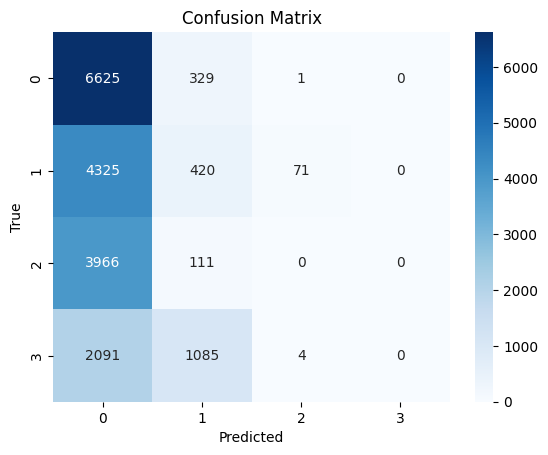

In [ ]:
# print the confusion matrix
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from matplotlib import pyplot as plt

cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
